In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [22]:
data=pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [23]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
data['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [25]:
data['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [26]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:>

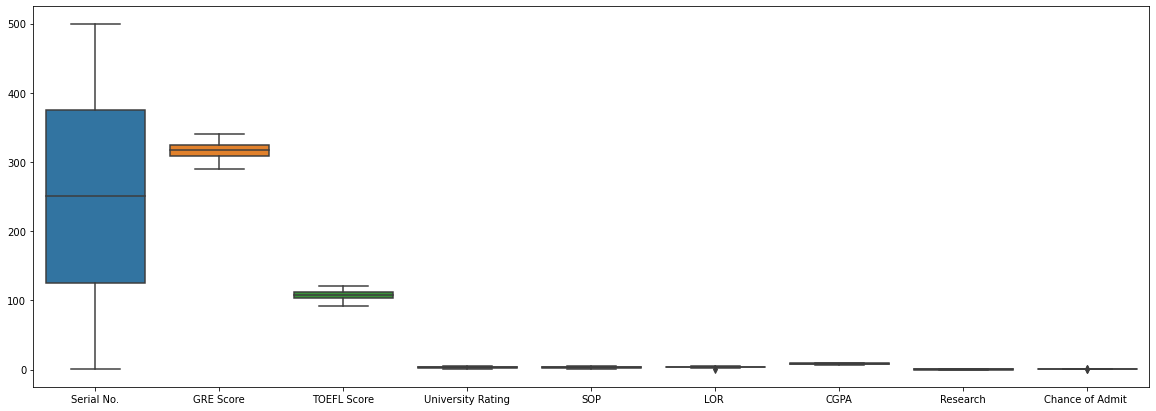

In [62]:
plt.subplots(figsize=(20,7))
sns.boxplot(data=data)

NO OUTLIER

# see how data is distributed for every column

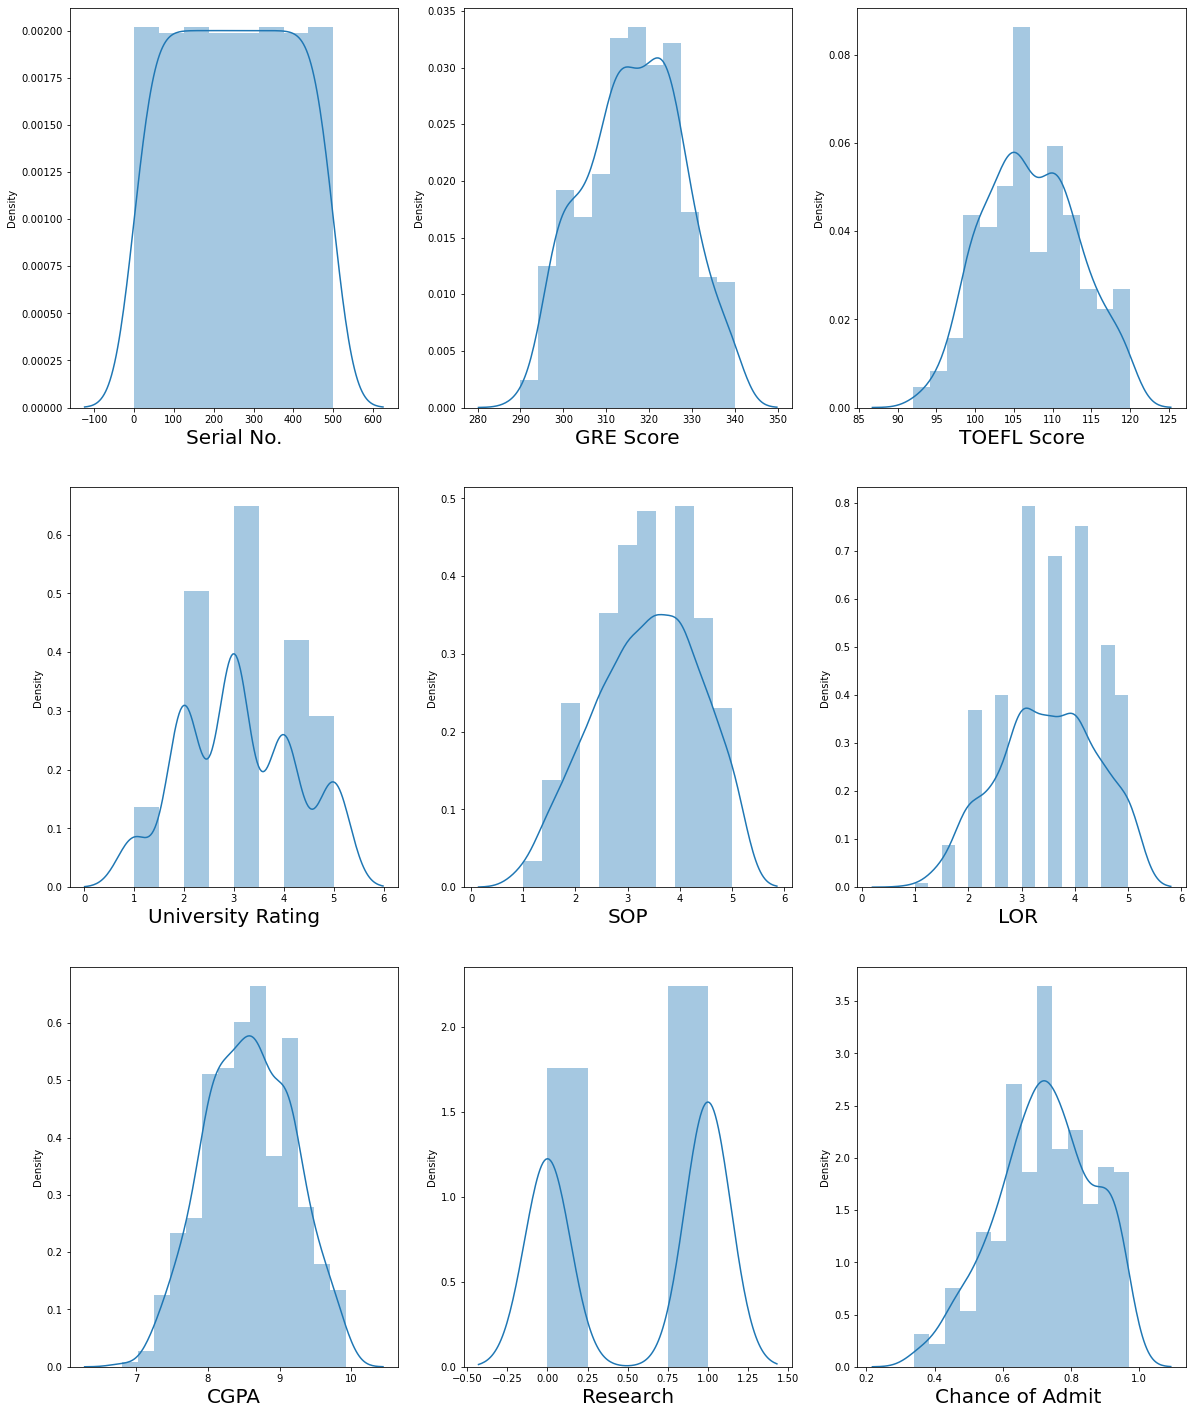

In [64]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


# Checingk Correlation

<AxesSubplot:>

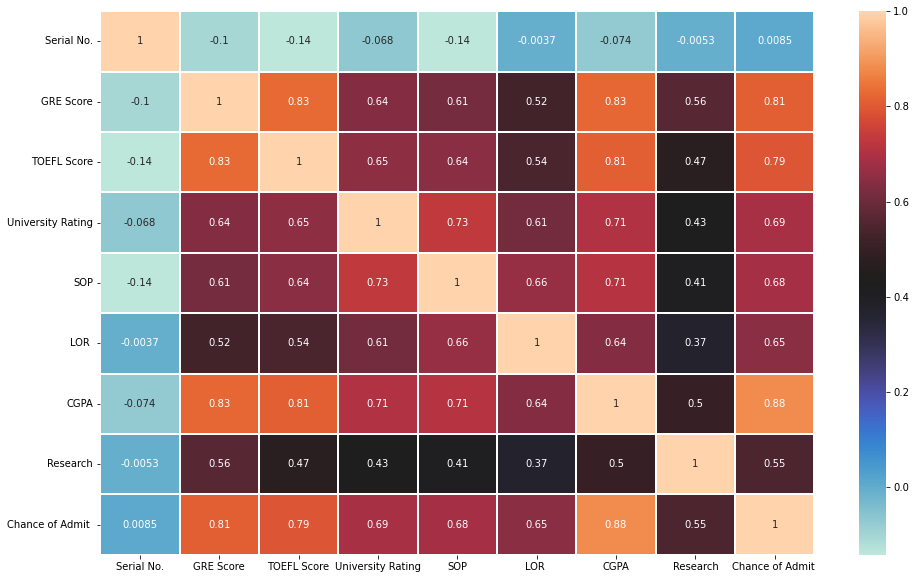

In [60]:
plt.figure(figsize=(16,10))

sns.heatmap(data.corr(),annot=True,cmap='icefire',linewidths=0.2)

# Independent Features

In [30]:
X = data.drop('Chance of Admit ',axis=1)

In [31]:
X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


# Dependent Feature

In [34]:
y=data["Chance of Admit "]

In [35]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

# SVR Model Training

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [49]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sr = StandardScaler()
X_train = sr.fit_transform(X_train)
X_test = sr.transform(X_test)

In [50]:
from sklearn.svm import SVR
classifier=SVR(kernel="rbf")
classifier.fit(X_train,y_train)

SVR()

In [54]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [56]:
y_pred

array([0.6031436 , 0.75020984, 0.65388388, 0.88262554, 0.70719213,
       0.72040092, 0.60853199, 0.73957338, 0.65555839, 0.73512649,
       0.50057531, 0.4651421 , 0.83825837, 0.77673383, 0.7299554 ,
       0.57768214, 0.62591566, 0.88246557, 0.78218895, 0.83987517,
       0.81018748, 0.58290016, 0.72286646, 0.80274409, 0.8556272 ,
       0.69574266, 0.64883027, 0.7260078 , 0.63880273, 0.52173514,
       0.60602905, 0.71412122, 0.83968408, 0.72898075, 0.80429097,
       0.81941789, 0.51606937, 0.76710295, 0.58580961, 0.83878118,
       0.71544013, 0.62741834, 0.81397482, 0.84301067, 0.65486328,
       0.83915214, 0.83265519, 0.66533455, 0.66957572, 0.56347245,
       0.7702024 , 0.77898269, 0.7124454 , 0.52562937, 0.49171143,
       0.86329516, 0.67445531, 0.75720462, 0.50586996, 0.69690054,
       0.72520804, 0.61948237, 0.67212584, 0.6096868 , 0.60987582,
       0.66257612, 0.5562933 , 0.78549676, 0.69411896, 0.68984629,
       0.83688045, 0.48570134, 0.58797895, 0.71702481, 0.62915

In [57]:
classifier.score(X_test,y_test)

0.6711539257780758